In [1]:
import sklearn.datasets


In [3]:
sklearn.datasets.make_blobs(
n_samples = 100,
n_features = 2,
centers = None,
cluster_std = 1.0,
center_box = (-10.0, 10.0),
shuffle=True,
random_state=None)

(array([[  0.31157358,   7.81148029],
        [ -8.16909   ,  -4.19257938],
        [ -7.83922029,  -8.08885451],
        [ -7.72862013,  -4.28516943],
        [ -7.01217014,  -5.90143342],
        [ -8.39201792,  -6.93655741],
        [ -9.5446096 ,  -8.94639634],
        [ -8.9148217 ,  -7.31702075],
        [ -9.18555715,  -8.2569429 ],
        [ -1.49601687,   7.00546685],
        [ -0.51040524,   7.11742058],
        [ -9.10736618,  -9.1316423 ],
        [ -8.38945748,  -2.38828546],
        [-10.7308959 ,  -7.08430493],
        [  1.05541186,   7.52832005],
        [  0.78118872,   7.84235835],
        [ -7.78155187,  -5.77091661],
        [  2.01538112,   7.74572874],
        [ -8.40555014,  -4.196521  ],
        [ -6.98136478,  -5.16465588],
        [ -1.0050021 ,   6.708437  ],
        [  1.2844367 ,   7.03765213],
        [ -9.25649394,  -5.52647355],
        [ -7.48380227,  -4.92186666],
        [ -7.21932801,  -4.38265018],
        [ -6.78640416,  -5.63489483],
        [ -7

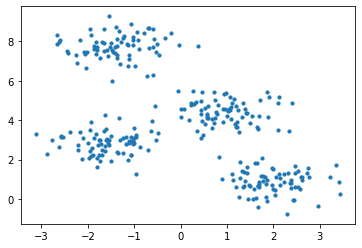

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.datasets import make_blobs
X,y_true = make_blobs(n_samples = 300, centers = 4, cluster_std = 0.60, random_state = 0)
plt.scatter(X[:,0], X[:,1], s=10)
plt.show()


In [8]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

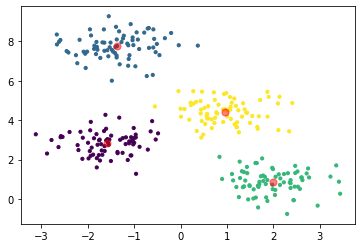

In [10]:
plt.scatter(X[:,0], X[:,1], c=y_kmeans, s=10, cmap='viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:,0], centers[:,1], c='red', s=50, alpha=0.5)
plt.show()

(300, 2)


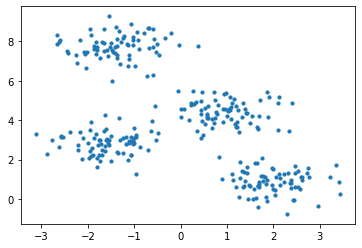

In [16]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
# Generate a two-dimensional dataset containing four distinct blobs.
from sklearn.datasets import make_blobs
X, y_true = make_blobs(n_samples=300, centers=4, cluster_std=0.60, 
random_state=0)
print(X.shape)           # (300, 2)
plt.scatter(X[:, 0], X[:, 1], s=10);
plt.show()

In [19]:
# Number of clusters
k = 4
# Number of sample data
m = X.shape[0]
# Number of features 
n = X.shape[1]
print('k =',k, 'clusters', '\tm =', m, 'sample data', '\t n =', n, 'features')
# Set the initial centroids
mean = np.mean(X, axis = 0)
std = np.std(X, axis = 0)
centers = np.random.randn(k, n) * std + mean
centers.shape


k = 4 clusters 	m = 300 sample data 	 n = 2 features


(4, 2)

In [20]:
centers_old = np.zeros(centers.shape)
centers_new = np.copy(centers)
clusters = np.zeros(m)
distances = np.zeros((m, k))
error = np.linalg.norm(centers_new - centers_old)
iterations = 0

In [21]:
while error > 0.0001:
    iterations += 1
    # find the distance between each of the points to each of the centroids
    for i in range(k):
         distances[:,i] = np.linalg.norm(X - centers_new[i], axis=1)    
    # assign each point to the closest centroid
    clusters = np.argmin(distances, axis = 1)    
    centers_old = np.copy(centers_new)    
    # compute the new centroids based 
    for i in range(k):
         centers_new[i] = np.mean(X[clusters == i], axis=0)    
    error = np.linalg.norm(centers_new - centers_old)

In [22]:
unique, counts = np.unique(y_true, return_counts=True)
dict(zip(unique, counts))
{0: 75, 1: 75, 2: 75, 3: 75}
from scipy.stats import mode
labels = np.zeros_like(clusters)
for i in range(k):
    mask = (clusters == i)
    labels[mask] = mode(y_true[mask])[0]
    print(i,":", labels[mask].shape, mode(y_true[mask]))

0 : (75,) ModeResult(mode=array([2]), count=array([75]))
1 : (75,) ModeResult(mode=array([0]), count=array([75]))
2 : (75,) ModeResult(mode=array([1]), count=array([75]))
3 : (75,) ModeResult(mode=array([3]), count=array([75]))


1.0


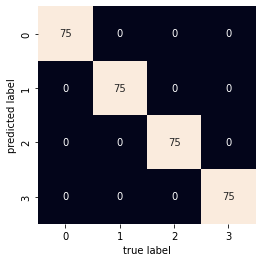

In [23]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_true, labels))
import seaborn as sns
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(y_true, labels)
sns.heatmap(mat.T, square=True, annot=True, 
fmt='d', cbar=False,
xticklabels=['0','1','2','3'],
  yticklabels=['0','1','2','3'])
plt.xlabel('true label')
plt.ylabel('predicted label');

In [26]:
def show_progress(X1, X2, clusters, centers):
    plt.scatter(X1, X2, c=clusters, s=50, cmap='viridis')
    plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.5);
    plt.show()

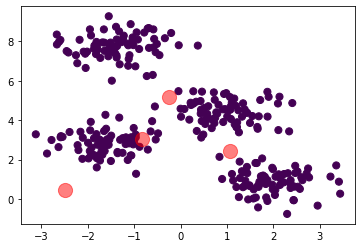

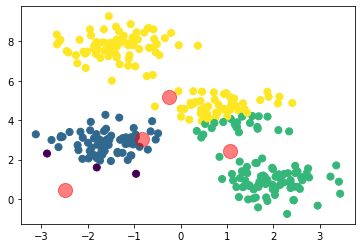

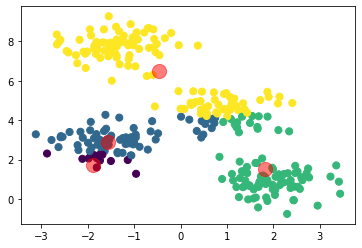

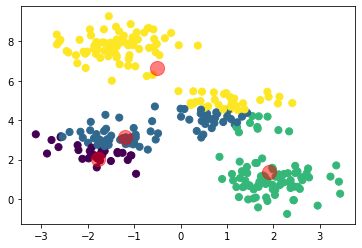

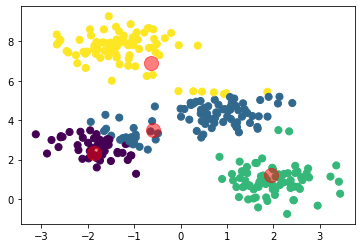

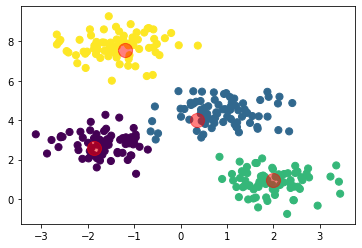

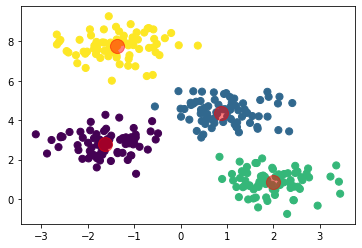

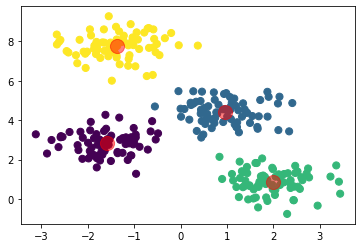

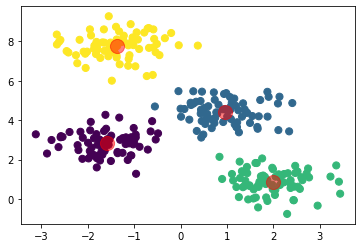

In [27]:
centers_old = np.zeros(centers.shape)
centers_new = np.copy(centers)
clusters = np.zeros(m)
distances = np.zeros((m,k))
error = np.linalg.norm(centers_new - centers_old)
show_progress(X[:,0], X[:,1], clusters, centers_new)
iterations = 0
while error != 0:
    iterations += 1
    for i in range(k):
        distances[:,i] = np.linalg.norm(X - centers_new[i], axis=1)
    clusters = np.argmin(distances, axis = 1)
    show_progress(X[:,0], X[:,1], clusters, centers_new)
    centers_old = np.copy(centers_new)
    for i in range(k):
        centers_new[i] = np.mean(X[clusters == i], axis=0)
    error = np.linalg.norm(centers_new - centers_old)
show_progress(X[:,0], X[:,1], clusters, centers_new)

In [28]:
from sklearn.datasets import load_digits
digits = load_digits()
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = \
    train_test_split(digits.data, digits.target, test_size=0.25, random_state=42)
kmeans = KMeans(n_clusters=10, random_state=0)
kmeans.fit(X_train, y_train)
predictions = kmeans.predict(X_test)

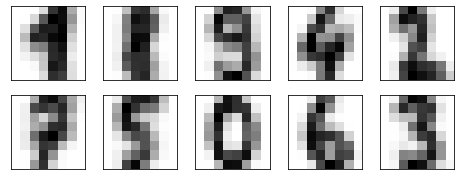

In [29]:
fig, ax = plt.subplots(2, 5, figsize=(8, 3))
centers = kmeans.cluster_centers_.reshape(10, 8, 8)
for axi, center in zip(ax.flat, centers):
      axi.set(xticks=[], yticks=[])
      axi.imshow(center, interpolation='nearest', cmap=plt.cm.binary)

In [30]:
from scipy.stats import mode
labels = np.zeros_like(predictions)
for i in range(10):
    mask = (predictions == i)
    labels[mask] = mode(y_test[mask])[0]
from sklearn.metrics import accuracy_score
accuracy_score(y_test, labels)

0.8044444444444444

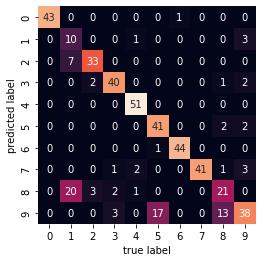

In [31]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(y_test, labels)
sns.heatmap(mat.T, square=True, annot=True, 
fmt='d', 
            cbar=False,
            xticklabels=digits.target_names,
            yticklabels=digits.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label');

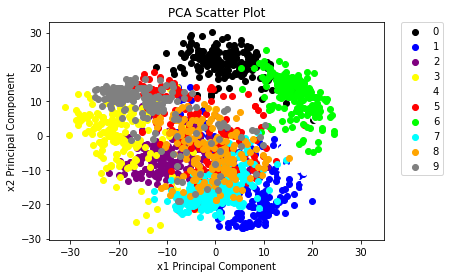

In [32]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(digits.data)
xpca = pca.transform(digits.data)
%matplotlib inline
colors = ['black', 'blue', 'purple', 'yellow', 'white', 'red', 'lime', 'cyan', 'orange', 'gray']
for i in range(len(colors)):
    x1 = xpca[:, 0][digits.target == i]
    x2 = xpca[:, 1][digits.target == i]
    plt.scatter(x1, x2, c=colors[i])
plt.legend(digits.target_names, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xlabel('x1 Principal Component')
plt.ylabel('x2 Principal Component')
plt.title("PCA Scatter Plot")
plt.show()